# <a id='toc1_'></a>[Data Modeling](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Data Modeling](#toc1_)    
- [Setup](#toc2_)    
- [Model Search](#toc3_)    
  - [Models: Hypothesis Formation and Assumptions](#toc3_1_)    
  - [Model Search: Grid Initiation](#toc3_2_)    
  - [Model Search: Fit HalfGrid](#toc3_3_)    
  - [Model Search: Performance, Efficiency, and Residual Evaluation of all Models](#toc3_4_)    
      - [**Performace Evaluation of All Models**](#toc3_4_1_1_)    
      - [**Performace Evaluation of Best Model**](#toc3_4_1_2_)    
      - [**Compute Efficiency and Runtime**](#toc3_4_1_3_)    
      - [**Residual Evaluation of Best Model**](#toc3_4_1_4_)    
  - [Final Model Tuning](#toc3_5_)    
    - [Final Model Hyperparameter Tuning](#toc3_5_1_)    
  - [Final Model Tuning: Evaluation of Hyperparameters](#toc3_6_)    
      - [**Performace Evaluation of All Hyperparameters**](#toc3_6_1_1_)    
      - [**Compute Efficiency and Runtime**](#toc3_6_1_2_)    
      - [**Performace Evaluation of Best Hyperparameters**](#toc3_6_1_3_)    
      - [**Residual Evaluation of Best Hyperparameters**](#toc3_6_1_4_)    
- [Key Findings](#toc4_)    
- [Recommendations](#toc5_)    
    - [Reference for other parameter grids](#toc5_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Setup](#toc0_)

In [203]:
# Import all functions and classes from the module named 'my_code'
from custom_functions_and_libraries import *

# Set the random.seed(42)
np.random.seed(42)
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['OMP_NUM_THREADS']='2'

# # import warnings
# warnings.filterwarnings('ignore')


# <a id='toc3_'></a>[Model Search](#toc0_)

In this section, we will apply some machine learning models on the data.


## <a id='toc3_1_'></a>[Models: Hypothesis Formation and Assumptions](#toc0_)



## <a id='toc3_2_'></a>[Model Search: Grid Initiation](#toc0_)



Here I created my X train and X test sets and y train and y test sets. 

Practice Classification Models:

In [204]:
classification = True
regression = False
clustering = False

if [classification, regression, clustering].count(True) > 1:
    raise ValueError("More than one of the classification, regression, and clustering flags are set to True. Please set only one to True.")

if [classification, regression, clustering].count(True) < 1:
    raise ValueError("None of the classification, regression, and clustering flags are set to True. Please set one to True.")

In [205]:


if classification:
    # Import the function to load the digits dataset from sklearn.datasets
    from sklearn.datasets import load_digits

    # Load the digits dataset into a variable called digits
    digits = load_digits()

    # Convert the digits dataset into a pandas DataFrame. The data is contained in digits.data and the column names in digits.feature_names
    df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

    # Add a new column to the DataFrame for the target variable. The target values are contained in digits.target
    df['target'] = digits.target
    df.info()
    
    # Split the digits dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['target']).copy()

    # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
    y_train = train_df['target'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['pixel_0_0']).copy()
    y_test = test_df['target'].copy()

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

if regression:
    from sklearn.datasets import fetch_california_housing

    # Load the California housing dataset
    california = fetch_california_housing()

    # Convert the dataset into a DataFrame
    df = pd.DataFrame(california.data, columns=california.feature_names)
    df.info()

    # Add the target variable to the DataFrame
    df['MedHouseVal'] = california.target

    # Split the dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['MedHouseVal']).copy()

    # Create the target vector for the training set (y_train) which is just the 'MedHouseVal' column from train_df
    y_train = train_df['MedHouseVal'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['MedHouseVal']).copy()
    y_test = test_df['MedHouseVal'].copy()

if clustering:
    # Import the function to load the wine dataset from sklearn.datasets
    from sklearn.datasets import load_breast_cancer

    # Load the breast cancer dataset
    cancer = load_breast_cancer()

    # Convert the cancer dataset into a pandas DataFrame. The data is contained in cancer.data and the column names in cancer.feature_names
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

    # Add a new column to the DataFrame for the target variable. The target values are contained in cancer.target
    df['target'] = cancer.target

    # Split the cancer dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['target']).copy()

    # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
    y_train = train_df['target'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['target']).copy()
    y_test = test_df['target'].copy()

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Create a pipeline for each type of problem.

In [206]:
# (Optional) Directory for caching transformers
# cachedir = mkdtemp()

# Define the pipeline steps where each step is a tuple of (name, transform)
# Here, 'None' means that the steps are just placeholders and will be defined in the parameter grid
estimators = [('scaler', StandardScaler()),
            ('feature_selection', None),
            ('dim_reducer', None),
            ('model', None)]

# Create the pipeline object
pipe = Pipeline(estimators) #, memory=cachedir

if regression:
    # Regression_models
    basic_regression_models = [LinearRegression(), SGDRegressor(), ElasticNet(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(kernel='rbf')] #SVR(kernel='rbf', gamma='auto'),
    advanced_regression_models = [RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(), CatBoostRegressor(), GradientBoostingRegressor()]
    all_regressor_models = basic_regression_models + advanced_regression_models

if classification:
    # Classifier_models
    basic_classifier_models = [LogisticRegression(), SGDClassifier(), DecisionTreeClassifier(), SVC(kernel='rbf'), KNeighborsClassifier()]
    advanced_classifier_models = [RandomForestClassifier(), ExtraTreesClassifier(), LGBMClassifier(), CatBoostClassifier(), GaussianNB()]
    all_classifier_models = basic_classifier_models + advanced_classifier_models

if clustering:
    # Clustering_models
    clustering_models = [KMeans(n_clusters=3, n_init='auto'), AgglomerativeClustering(n_clusters=5, linkage='average'), DBSCAN(eps=.7, min_samples=3), GaussianMixture(n_components=3)]

# # Time_series_models
# time_series_models = [
#     ARIMA(order=(1, 1, 1)),  # You'll need to determine the appropriate order parameters based on your data
#     SARIMAX(order=(1, 1, 1), seasonal_order=(1, 1, 1, 1)),  # The order and seasonal_order parameters will need to be determined based on your data
#     Prophet(), # Prophet requires a DataFrame with two columns ("ds" and "y"), where "ds" contains the timestamps and "y" contains the values.
#     Sequential().add(LSTM(50))  # LSTM, being a neural network, requires the input to be reshaped to the form [samples, time steps, features]
# ]

In [207]:
if regression:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': all_regressor_models}]


if classification:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': all_classifier_models}]


if clustering:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': clustering_models}]


## <a id='toc3_3_'></a>[Model Search: Fit HalfGrid](#toc0_)



Here I conducted the grid search. To keep track of the time it takes to run each model search, I created a function to time the model's run time. I also created a dataframe to store the results of each model search.

In [208]:
# classification_metrics = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
if classification:
    scoring_metric = 'accuracy'


# regression_metrics = ['r2', 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
if regression:
    scoring_metric = 'r2'
    

# clustering_metrics = ['adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score']
if clustering:
    scoring_metric = 'mutual_info_score'


In [209]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=1, n_jobs=-1, scoring=scoring_metric)

if clustering:
    # Fit the GridSearchCV object to the data - only X_train is required for clustering
    grid.fit(X_train, y_train)
else:
    # Fit the GridSearchCV object to the data - X_train and y_train are required for classification and regression
    grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 139
max_resources_: 1257
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 139
Fitting 3 folds for each of 10 candidates, totalling 30 fits


Learning rate set to 0.070061
0:	learn: 2.2551026	total: 4.2ms	remaining: 4.19s
Learning rate set to 0.070061
1:	learn: 2.2244824	total: 8.16ms	remaining: 4.07s
Learning rate set to 0.070061
0:	learn: 2.2636747	total: 4.55ms	remaining: 4.54s
2:	learn: 2.1944312	total: 12.6ms	remaining: 4.19s
1:	learn: 2.2244509	total: 8.66ms	remaining: 4.32s
3:	learn: 2.1538854	total: 16.6ms	remaining: 4.14s
2:	learn: 2.1971335	total: 12.8ms	remaining: 4.26s
4:	learn: 2.1074792	total: 20.7ms	remaining: 4.12s
0:	learn: 2.2574407	total: 11.1ms	remaining: 11.1s
3:	learn: 2.1575606	total: 17.1ms	remaining: 4.26s
5:	learn: 2.0757412	total: 24.8ms	remaining: 4.11s
4:	learn: 2.1197450	total: 21.4ms	remaining: 4.26s
6:	learn: 2.0472088	total: 28.7ms	remaining: 4.08s
5:	learn: 2.0903677	total: 25.5ms	remaining: 4.23s
1:	learn: 2.2133768	total: 21.9ms	remaining: 10.9s
7:	learn: 2.0054741	total: 31.8ms	remaining: 3.95s
6:	learn: 2.0577992	total: 29.3ms	remaining: 4.16s
2:	learn: 2.1716876	total: 25.7ms	remaining:

In [210]:
if clustering:
    # Initialize the best parameters and the best silhouette score
    best_model_no_ground_truth = None
    best_silhouette = -1

    # Perform grid search
    for model in clustering_models:
        model.fit(X_train)
        
        try:
            # Check if the model has found more than one cluster
            if len(set(model.labels_)) > 1:
                silhouette = silhouette_score(X_train, model.labels_)
                
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_model_no_ground_truth = model
        except:
            pass

    # Print the best model and silhouette score
    if best_model_no_ground_truth is not None:
        print('Best model:', best_model_no_ground_truth)
        print('Best silhouette score:', best_silhouette)
    else:
        print('No valid clustering found.')


In [211]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str).replace('_|().<>', ' ') if x.dtype == 'object' else x)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

grid_outcomes.T

0   \
iter                                                                          0   
n_resources                                                                 139   
mean_fit_time                                                          0.013835   
std_fit_time                                                           0.000318   
mean_score_time                                                         0.00169   
std_score_time                                                          0.00002   
param_model                                                LogisticRegression()   
param_scaler                                                   StandardScaler()   
params              {'model': LogisticRegression(), 'scaler': StandardScaler()}   
split0_test_score                                                      0.804348   
split1_test_score                                                      0.847826   
split2_test_score                                                      0.847826   
mean_test_score                                                        0.833333   
std_test_score                                                         0.020496   
rank_test_score                                                               9   
split0_train_score                                                          1.0   
split1_train_score                                                          1.0   
split2_train_score                                                          1.0   
mean_train_score                                                            1.0   
std_train_score                                                             0.0   

                                                                        1   \
iter                                                                     0   
n_resources                                                            139   
mean_fit_time                                                     0.007872   
std_fit_time                                                      0.000644   
mean_score_time                                                   0.001723   
std_score_time                                                    0.000078   
param_model                                                SGDClassifier()   
param_scaler                                              StandardScaler()   
params              {'model': SGDClassifier(), 'scaler': StandardScaler()}   
split0_test_score                                                  0.76087   
split1_test_score                                                 0.826087   
split2_test_score                                                  0.73913   
mean_test_score                                                   0.775362   
std_test_score                                                    0.036949   
rank_test_score                                                         12   
split0_train_score                                                     1.0   
split1_train_score                                                     1.0   
split2_train_score                                                 0.98913   
mean_train_score                                                  0.996377   
std_train_score                                                   0.005124   

                                                                                 2   \
iter                                                                              0   
n_resources                                                                     139   
mean_fit_time                                                              0.004829   
std_fit_time                                                               0.000495   
mean_score_time                                                            0.001464   
std_score_time                                                             0.000042   
param_model                                                DecisionTreeClassifier()  

## <a id='toc3_4_'></a>[Model Search: Performance, Efficiency, and Residual Evaluation of all Models](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [212]:
print(grid_outcomes.columns)

first_hyperparameter = 'param_model'
second_hyperparameter = None

grid_outcomes.groupby(first_hyperparameter)

Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


#### <a id='toc3_4_1_1_'></a>[**Performace Evaluation of All Models**](#toc0_)

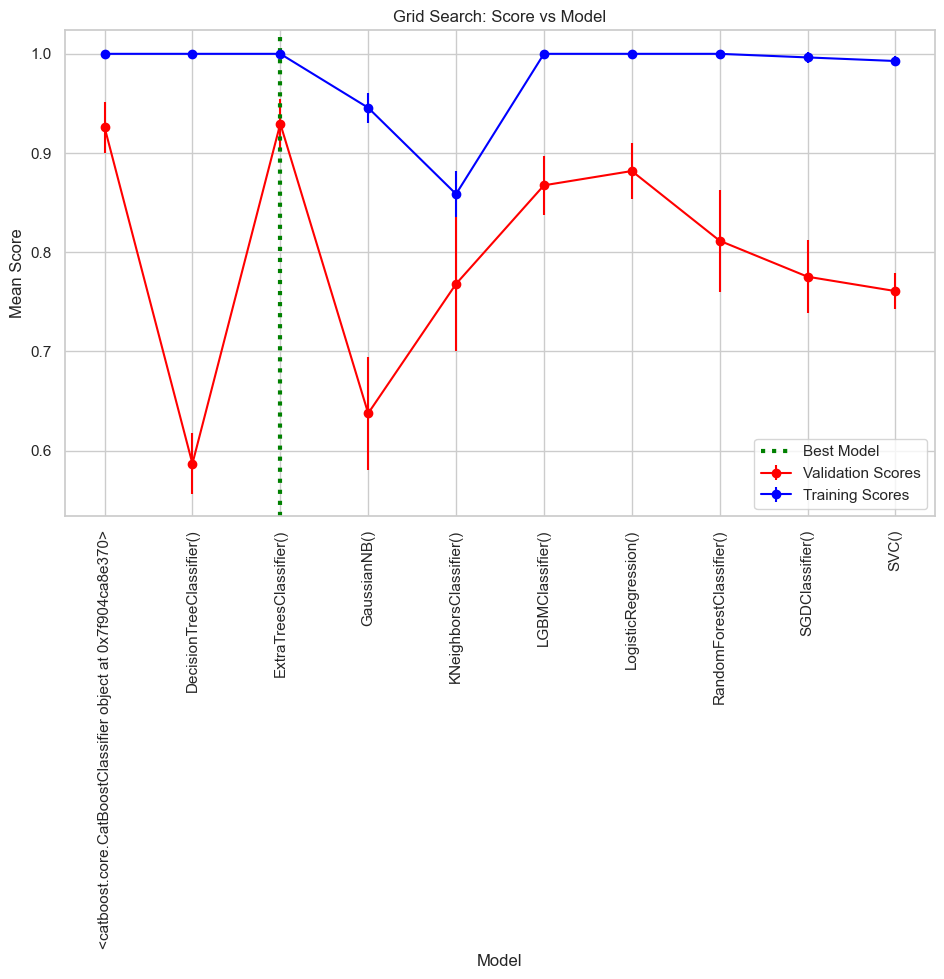

In [213]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)


#### <a id='toc3_4_1_2_'></a>[**Performace Evaluation of Best Model**](#toc0_)

1  \
param_model               ExtraTreesClassifier()   
param_scaler                    StandardScaler()   
score_method                            accuracy   
train_score_average                          1.0   
validation_score_average                0.976819   
n_splits                                       3   
mean_fit_time                           0.153131   
mean_score_time                         0.013786   

                                                                                    2  \
param_model               <catboost.core.CatBoostClassifier object at 0x7f904ca8e370>   
param_scaler                                                         StandardScaler()   
score_method                                                                 accuracy   
train_score_average                                                               1.0   
validation_score_average                                                     0.973621   
n_splits                                                                            3   
mean_fit_time                                                                6.560498   
mean_score_time                                                              0.004696   

                                                                                    3  
param_model               <catboost.core.CatBoostClassifier object at 0x7f904ca8e370>  
param_scaler                                                         StandardScaler()  
score_method                                                                 accuracy  
train_score_average                                                               1.0  
validation_score_average                                                     0.942446  
n_splits                                                                            3  
mean_fit_time                                                                5.745452  
mean_score_time                                                              0.003729

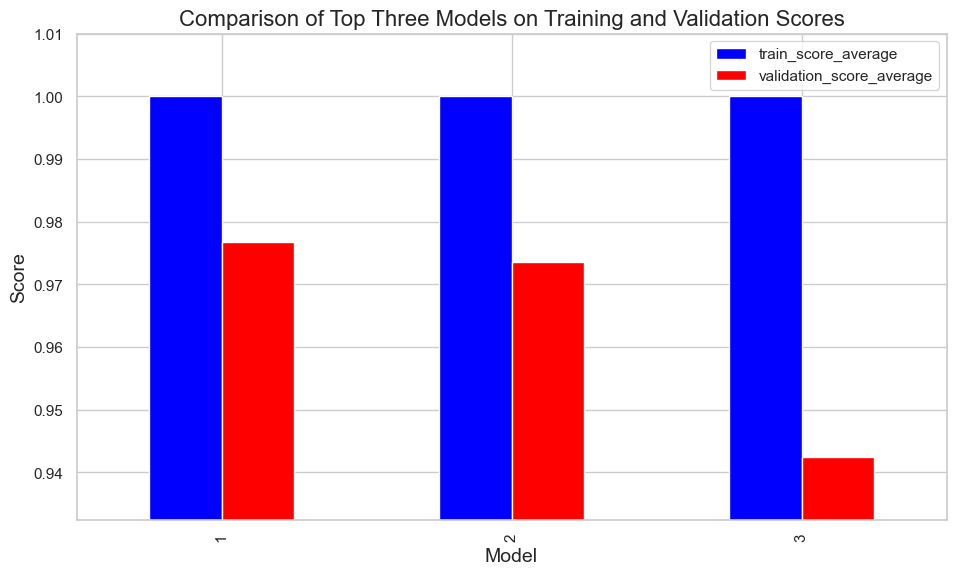

In [214]:
top_3_model_results(grid_outcomes, grid, show_bars=True).T


In [218]:

# Using the function
if regression:
    evaluate_regression_model(best_model, X_test, y_test, plot=True)

# if classification:
    # evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)

print('Best Model\'s Refit Time', round(grid.refit_time_, 3), '\nTotal Search Time', round(time_taken, 3))


Best Model's Refit Time 0.194 
Total Search Time 17.285


#### <a id='toc3_4_1_3_'></a>[**Compute Efficiency and Runtime**](#toc0_)

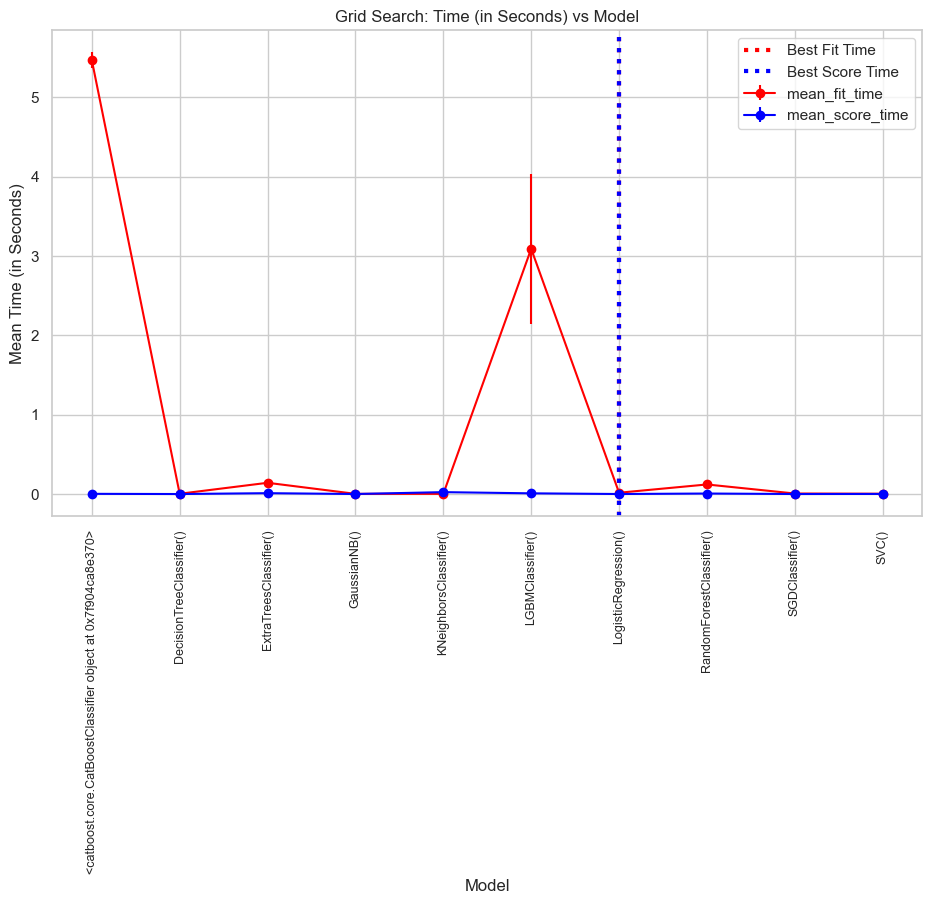

In [219]:

plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)



#### <a id='toc3_4_1_4_'></a>[**Residual Evaluation of Best Model**](#toc0_)

Independence and Identically Distributed, Normality, and Homoscedasticity

In [220]:
if regression:
    plot_regression_residuals(best_model, X_test, y_test)

# if classification:
#     plot_classifier_residuals(best_model, X_test, y_test, True)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- target
Feature names seen at fit time, yet now missing:
- pixel_0_0


These two visual tests show that the distribution of the residuals is normally distributed and appears to be independent of the fitted values. Furthermore, the Durbin-Watson of the residuals is close to 2, which indicates that there is very little to no autocorrelation in the residuals. Therefore we can conclude that the residuals are not correlated with each other and the distribution of the residuals is not dependent on the predicted probability of the target class. This means that this model meets the assumption of independence and identically distributed. 



## <a id='toc3_5_'></a>[Final Model Tuning](#toc0_)

### <a id='toc3_5_1_'></a>[Final Model Hyperparameter Tuning](#toc0_)

In [221]:
if regression:
        param_grid_catboost = {'scaler': [StandardScaler()],
                'model': [CatBoostRegressor()],
                'model__learning_rate': np.logspace(-2, -1, 10),
                'model__iterations': [1000],
                'model__depth': [5, 6, 7]}

        param_grid = param_grid_catboost

In [222]:
# classification_metrics = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
if classification:
    scoring_metric = 'accuracy'


# regression_metrics = ['r2', 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
if regression:
    scoring_metric = 'r2'
    

# clustering_metrics = ['adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score']
if clustering:
    scoring_metric = 'adjusted_rand_score'


In [223]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=0, n_jobs=-1, scoring=scoring_metric)


if clustering:
    # Fit the GridSearchCV object to the data - only X_train is required for clustering
    grid.fit(X_train, y_train)
else:
    # Fit the GridSearchCV object to the data - X_train and y_train are required for classification and regression
    grid.fit(X_train, y_train)
    

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time


Learning rate set to 0.070061
0:	learn: 2.2651482	total: 5.66ms	remaining: 5.66s
Learning rate set to 0.070061
1:	learn: 2.2223047	total: 11.4ms	remaining: 5.68s
0:	learn: 2.2640045	total: 4.96ms	remaining: 4.95s
Learning rate set to 0.070061
1:	learn: 2.2360217	total: 10.3ms	remaining: 5.12s
2:	learn: 2.1894994	total: 18.3ms	remaining: 6.08s
0:	learn: 2.2562125	total: 4.55ms	remaining: 4.55s
2:	learn: 2.2001096	total: 14.4ms	remaining: 4.8s
3:	learn: 2.1483950	total: 23.4ms	remaining: 5.83s
1:	learn: 2.2216986	total: 10.3ms	remaining: 5.12s
3:	learn: 2.1612385	total: 19.3ms	remaining: 4.8s
4:	learn: 2.1056145	total: 28.7ms	remaining: 5.71s
2:	learn: 2.1726916	total: 14.7ms	remaining: 4.9s
5:	learn: 2.0782448	total: 31ms	remaining: 5.13s
4:	learn: 2.1251034	total: 25.5ms	remaining: 5.08s
3:	learn: 2.1221222	total: 19.5ms	remaining: 4.85s
6:	learn: 2.0386649	total: 34.3ms	remaining: 4.87s
7:	learn: 2.0045017	total: 38ms	remaining: 4.72s
5:	learn: 2.0802544	total: 30.4ms	remaining: 5.03s

In [224]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str).replace('_|().<>', ' ') if x.dtype == 'object' else x)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_


## <a id='toc3_6_'></a>[Final Model Tuning: Evaluation of Hyperparameters](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [226]:
print(grid_outcomes.columns)

first_hyperparameter = 'iter'
second_hyperparameter = 'param_model'

grid_outcomes.groupby(first_hyperparameter)

Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


#### <a id='toc3_6_1_1_'></a>[**Performace Evaluation of All Hyperparameters**](#toc0_)

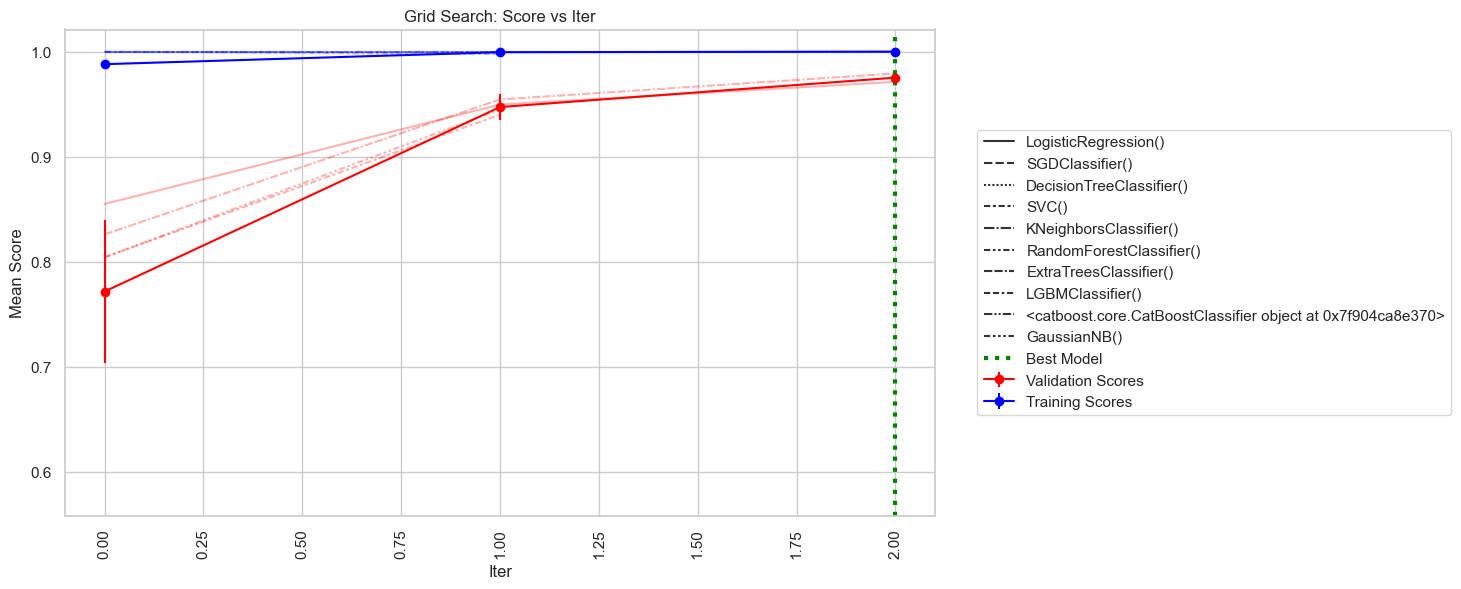

In [227]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                second_hyperparameter=second_hyperparameter)


#### <a id='toc3_6_1_2_'></a>[**Compute Efficiency and Runtime**](#toc0_)

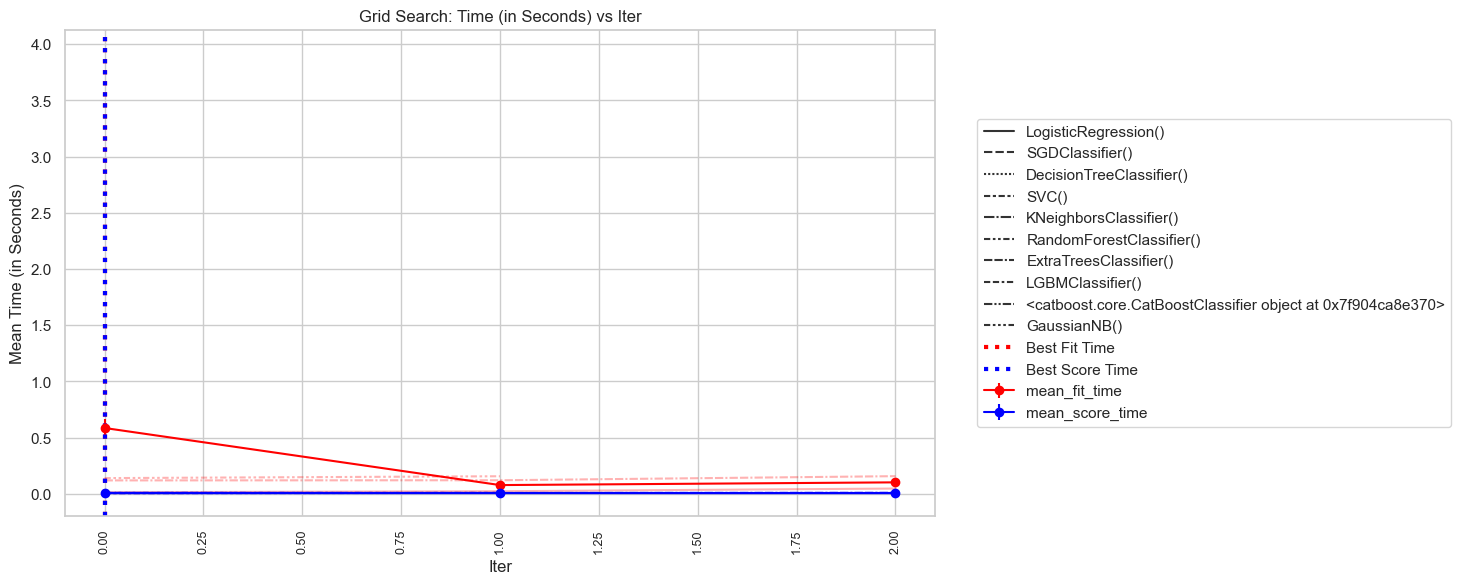

In [228]:

plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)



#### <a id='toc3_6_1_3_'></a>[**Performace Evaluation of Best Hyperparameters**](#toc0_)

1                     2  \
param_model               ExtraTreesClassifier()  LogisticRegression()   
param_scaler                    StandardScaler()      StandardScaler()   
score_method                            accuracy              accuracy   
train_score_average                          1.0                   1.0   
validation_score_average                0.979217              0.971223   
n_splits                                       3                     3   
mean_fit_time                           0.157143              0.047034   
mean_score_time                         0.013276              0.001707   

                                               3  
param_model               ExtraTreesClassifier()  
param_scaler                    StandardScaler()  
score_method                            accuracy  
train_score_average                          1.0  
validation_score_average                0.954436  
n_splits                                       3  
mean_fit_time                           0.120785  
mean_score_time                         0.008978

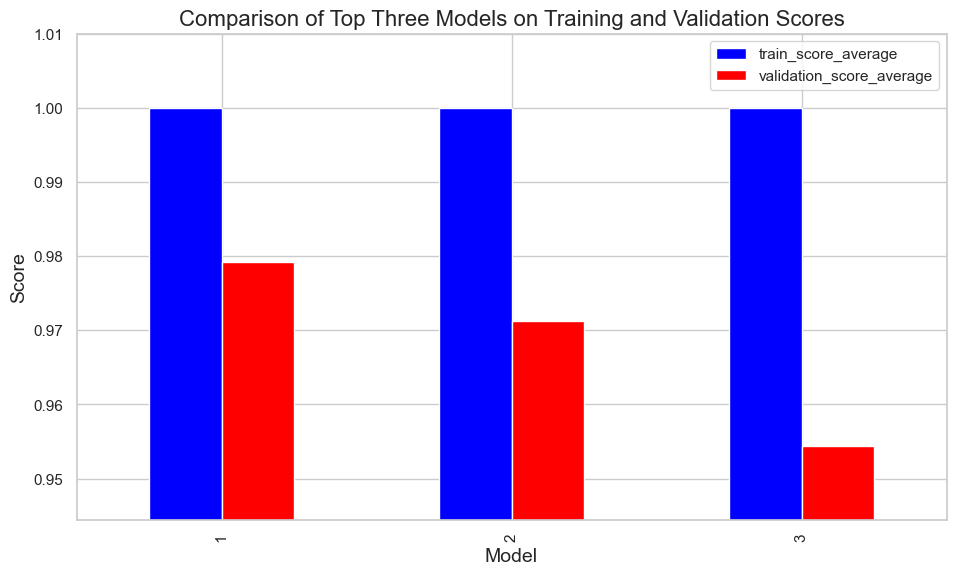

In [231]:
top_3_model_results(grid_outcomes, grid, show_bars=True).T

In [232]:
# Using the function
if regression:
    evaluate_regression_model(best_model, X_test, y_test, plot=True)

# if classification:
#     evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)

print('Best Model\'s Refit Time', round(grid.refit_time_, 3),
'\nTotal Search Time', round(time_taken, 3))


Best Model's Refit Time 0.201 
Total Search Time 4.876


#### <a id='toc3_6_1_4_'></a>[**Residual Evaluation of Best Hyperparameters**](#toc0_)

Independence and Identically Distributed, Normality, and Homoscedasticity

In [234]:
if regression:
    plot_regression_residuals(best_model, X_test, y_test)

# if classification:
#     plot_classifier_residuals(best_model, X_test, y_test, True)

# <a id='toc4_'></a>[Key Findings](#toc0_)

Summarize the findings from the analyses.



# <a id='toc5_'></a>[Recommendations](#toc0_)

List number of actionables based on the findings.

### <a id='toc5_1_1_'></a>[Reference for other parameter grids](#toc0_)

In [235]:
# Parameter grid for LinearRegression
param_grid_linreg = {'scaler': [StandardScaler()],
    'model': [LinearRegression()],
    # Linear Regression does not really have any hyperparameters
}

# Parameter grid for SGDRegressor
param_grid_sgdreg = {'scaler': [StandardScaler()],
    'model': [SGDRegressor()],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for ElasticNet
param_grid_elasticnet = {'scaler': [StandardScaler()],
    'model': [ElasticNet()],
    'model__alpha': np.logspace(-4, 4, 20),
    'model__l1_ratio': np.linspace(0, 1, 10)
}

# Parameter grid for DecisionTreeRegressor
param_grid_dtr = {'scaler': [StandardScaler()],
    'model': [DecisionTreeRegressor()],
    'model__criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVR
param_grid_svr = {'scaler': [StandardScaler()],
    'model': [SVR()],
    'model__C': np.logspace(-2, 1, 3),
    'model__kernel': ['poly', 'rbf', 'sigmoid'],
    'model__gamma': ['auto'] # 'scale',
}

# Parameter grid for KNeighborsRegressor
param_grid_knr = {'scaler': [StandardScaler()],
    'model': [KNeighborsRegressor()],
    'model__n_neighbors':  range(3, 31, 4),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Combine all parameter grids into a list
basic_regression_param_grids = [param_grid_linreg, param_grid_sgdreg, param_grid_elasticnet, param_grid_dtr,  param_grid_svr, param_grid_knr] #


In [236]:
# Parameter grid for LogisticRegression
param_grid_logreg = {'scaler': [StandardScaler()],
    'model': [LogisticRegression()],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': np.logspace(-4, 4, 10)
}

# Parameter grid for SGDClassifier
param_grid_sgd = {'scaler': [StandardScaler()],
    'model': [SGDClassifier()],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': np.logspace(-4, 4, 10)
}

# Parameter grid for DecisionTreeClassifier
param_grid_dtc = {'scaler': [StandardScaler()],
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVC
param_grid_svc = {'scaler': [StandardScaler()],
    'model': [SVC()],
    'model__C': np.logspace(-2, 2, 5),
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsClassifier
param_grid_knc = {'scaler': [StandardScaler()],
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_classifier_param_grids = [param_grid_logreg, param_grid_sgd, param_grid_dtc, param_grid_svc, param_grid_knc]


In [252]:
# Parameter grid for KMeans
param_grid_kmeans = {'scaler': [StandardScaler()],
    'model': [KMeans()],
    'model__n_clusters': range(2, 11, 2),
    'model__init': ['k-means++', 'random'],
    'model__n_init': [10, 20]
}

# Parameter grid for AgglomerativeClustering
param_grid_aggc = {'scaler': [StandardScaler()],
    'model': [AgglomerativeClustering()],
    'model__n_clusters': range(2, 11, 2),
    'model__linkage': ['ward', 'complete', 'average', 'single']
}

# Parameter grid for DBSCAN
param_grid_dbscan = {'scaler': [StandardScaler()],
    'model': [DBSCAN()],
    'model__eps': [0.3, 0.5, 0.7],
    'model__min_samples': [4, 10, 18]
}

# Parameter grid for GaussianMixture
param_grid_gmm = {'scaler': [StandardScaler()],
    'model': [GaussianMixture()],
    'model__init_params': ['kmeans++', 'random'],
    'model__n_components': range(2, 11, 2),
    'model__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Combine all parameter grids into a list
clustering_param_grids = [param_grid_kmeans, param_grid_aggc, param_grid_dbscan, param_grid_gmm]


In [253]:
# Parameter grid for RandomForestClassifier
param_grid_rfc = {'scaler': [StandardScaler()],
    'model': [RandomForestClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for ExtraTreesClassifier
param_grid_etc = {'scaler': [StandardScaler()],
    'model': [ExtraTreesClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for LGBMClassifier
param_grid_lgbmc = {'scaler': [StandardScaler()],
    'model': [LGBMClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostClassifier
param_grid_catboostc = {'scaler': [StandardScaler()],
    'model': [CatBoostClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [500, 1000],
    'model__depth': [5, 7, 10]
}

# Parameter grid for GaussianNB
param_grid_gnb = {
    'model': [GaussianNB()]  # no hyperparameters to tune
}

# Combine all parameter grids into a list
advanced_classifier_param_grids = [param_grid_rfc, param_grid_etc, param_grid_lgbmc, param_grid_catboostc, param_grid_gnb]


In [254]:
# Parameter grid for RandomForestRegressor
param_grid_rfr = {'scaler': [StandardScaler()],
    'model': [RandomForestRegressor()],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 15],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Parameter grid for ExtraTreesRegressor
param_grid_etr = {'scaler': [StandardScaler()],
    'model': [ExtraTreesRegressor()],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 15],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for LGBMRegressor
param_grid_lgbm = {'scaler': [StandardScaler()],
    'model': [LGBMRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200],
    'model__num_leaves': [31, 60],
    'model__max_depth': [None, 5, 15]
}

# Parameter grid for CatBoostRegressor
param_grid_catboost = {'scaler': [StandardScaler()],
    'model': [CatBoostRegressor()],
    'model__learning_rate': np.logspace(-2, 1, 3),
    'model__iterations': [750],
    'model__depth': [4, 7]
}

# Parameter grid for GradientBoostingRegressor
param_grid_gbr = {'scaler': [StandardScaler()],
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200],
    'model__subsample': [0.8],
    'model__max_depth': [None, 3, 5]
}

# Combine all parameter grids into a list
advanced_regression_param_grids = [param_grid_rfr, param_grid_etr, param_grid_lgbm, param_grid_catboost, param_grid_gbr]


In [255]:

# Classifier parameter grids
basic_classifier_param_grids
advanced_classifier_param_grids

# Regressor parameter grids
basic_regression_param_grids
advanced_regression_param_grids

# Clustering parameter grids
clustering_param_grids

[{'scaler': [StandardScaler()],
  'model': [KMeans()],
  'model__n_clusters': range(2, 11, 2),
  'model__init': ['k-means++', 'random'],
  'model__n_init': [10, 20]},
 {'scaler': [StandardScaler()],
  'model': [AgglomerativeClustering()],
  'model__n_clusters': range(2, 11, 2),
  'model__linkage': ['ward', 'complete', 'average', 'single']},
 {'scaler': [StandardScaler()],
  'model': [DBSCAN()],
  'model__eps': [0.3, 0.5, 0.7],
  'model__min_samples': [4, 10, 18]},
 {'scaler': [StandardScaler()],
  'model': [GaussianMixture()],
  'model__init_params': ['kmeans++', 'random'],
  'model__n_components': range(2, 11, 2),
  'model__covariance_type': ['full', 'tied', 'diag', 'spherical']}]

In [256]:
scoring_metric

'accuracy'

In [257]:
# Suppose the list of parameter grids is as follows
if classification:
    param_grids = basic_classifier_param_grids

if regression:
    param_grids = basic_regression_param_grids


# Empty DataFrame to store the results
results_df = []

# Iterate over each parameter grid in the list
for i, param_grid in enumerate(param_grids):
    
    # Capture the current time to measure the time taken by the grid search
    start_time = time.time()
    
    # Define a HalvingRandomSearchCV object with the pipeline, parameter grid, and desired settings
    grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                        cv=3, refit=True, verbose=1, n_jobs=-1, scoring=scoring_metric)

    # Fit the GridSearchCV object to the data - this will perform the actual grid search
    grid.fit(X_train, y_train)
    
    # Calculate the total time taken for the grid search by subtracting the start time from the end time
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Retrieve the best parameters, best training score, best test score, and mean fit time
    best_params = grid.best_params_
    train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
    test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
    mean_fit_time = grid.cv_results_['mean_fit_time'][grid.best_index_]
    
    # Append the results to the DataFrame
    results_df.append({
        'params': best_params, 
        'train_score': round(train_score, 3), 
        'validation_score': round(test_score, 3), 
        'mean_fit_time': mean_fit_time,
        'search_time': time_taken
    })
    
    print("Total Time Taken:", time_taken)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 15
max_resources_: 1257
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 15
Fitting 3 folds for each of 240 candidates, totalling 720 fits


----------
iter: 1
n_candidates: 80
n_resources: 45
Fitting 3 folds for each of 80 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 27
n_resources: 135
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 3
n_candidates: 9
n_resources: 405
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 4
n_candidates: 3
n_resources: 1215
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Total Time Taken: 29.87349772453308
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 15
max_resources_: 1257
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 15
Fitting 3 folds for each of 240 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 80
n_resources: 45
Fitting 3 folds for each of 80 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 27
n_resources: 135
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 3
n_c

In [261]:

# Display the resulting DataFrame
advanced_classified = pd.DataFrame(results_df).sort_values(by='validation_score', ascending=False)
advanced_classified

params  \
1                                    {'model': ExtraTreesClassifier(), 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'scaler': StandardScaler()}   
3                                     {'model': <catboost.core.CatBoostClassifier object at 0x7f90385e9ac0>, 'model__depth': 10, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}   
0                                  {'model': RandomForestClassifier(), 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'scaler': StandardScaler()}   
2  {'model': LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=200), 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__num_leaves': 31, 'scaler': StandardScaler()}   
4                                                                                                                                                                                             {'model': GaussianNB()}   

   train_score  validation_score  mean_fit_time  search_time  
1        1.000             0.978       0.197817    20.168798  
3        1.000             0.975      82.557003   439.419772  
0        1.000             0.974       0.295024    29.873498  
2        1.000             0.967       1.545171     9.281773  
4        0.846             0.796       0.028091     0.138883

In [ ]:
kkkkkkkk

In [259]:


# display(advanced.style.background_gradient(cmap='Blues', subset=['train_score', 'validation_score']).background_gradient(cmap='Reds', subset=['mean_fit_time', 'search_time']))
# display(basic.style.background_gradient(cmap='Blues', subset=['train_score', 'validation_score']).background_gradient(cmap='Reds', subset=['mean_fit_time', 'search_time']))
# display(classified_basic.style.background_gradient(cmap='Blues', subset=['train_score', 'validation_score']).background_gradient(cmap='Reds', subset=['mean_fit_time', 'search_time']))
# display(advanced_classified.style.background_gradient(cmap='Blues', subset=['train_score', 'validation_score']).background_gradient(cmap='Reds', subset=['mean_fit_time', 'search_time']))


![Screenshot 2023-07-17 at 00.47.03.png](<attachment:Screenshot 2023-07-17 at 00.47.03.png>) 


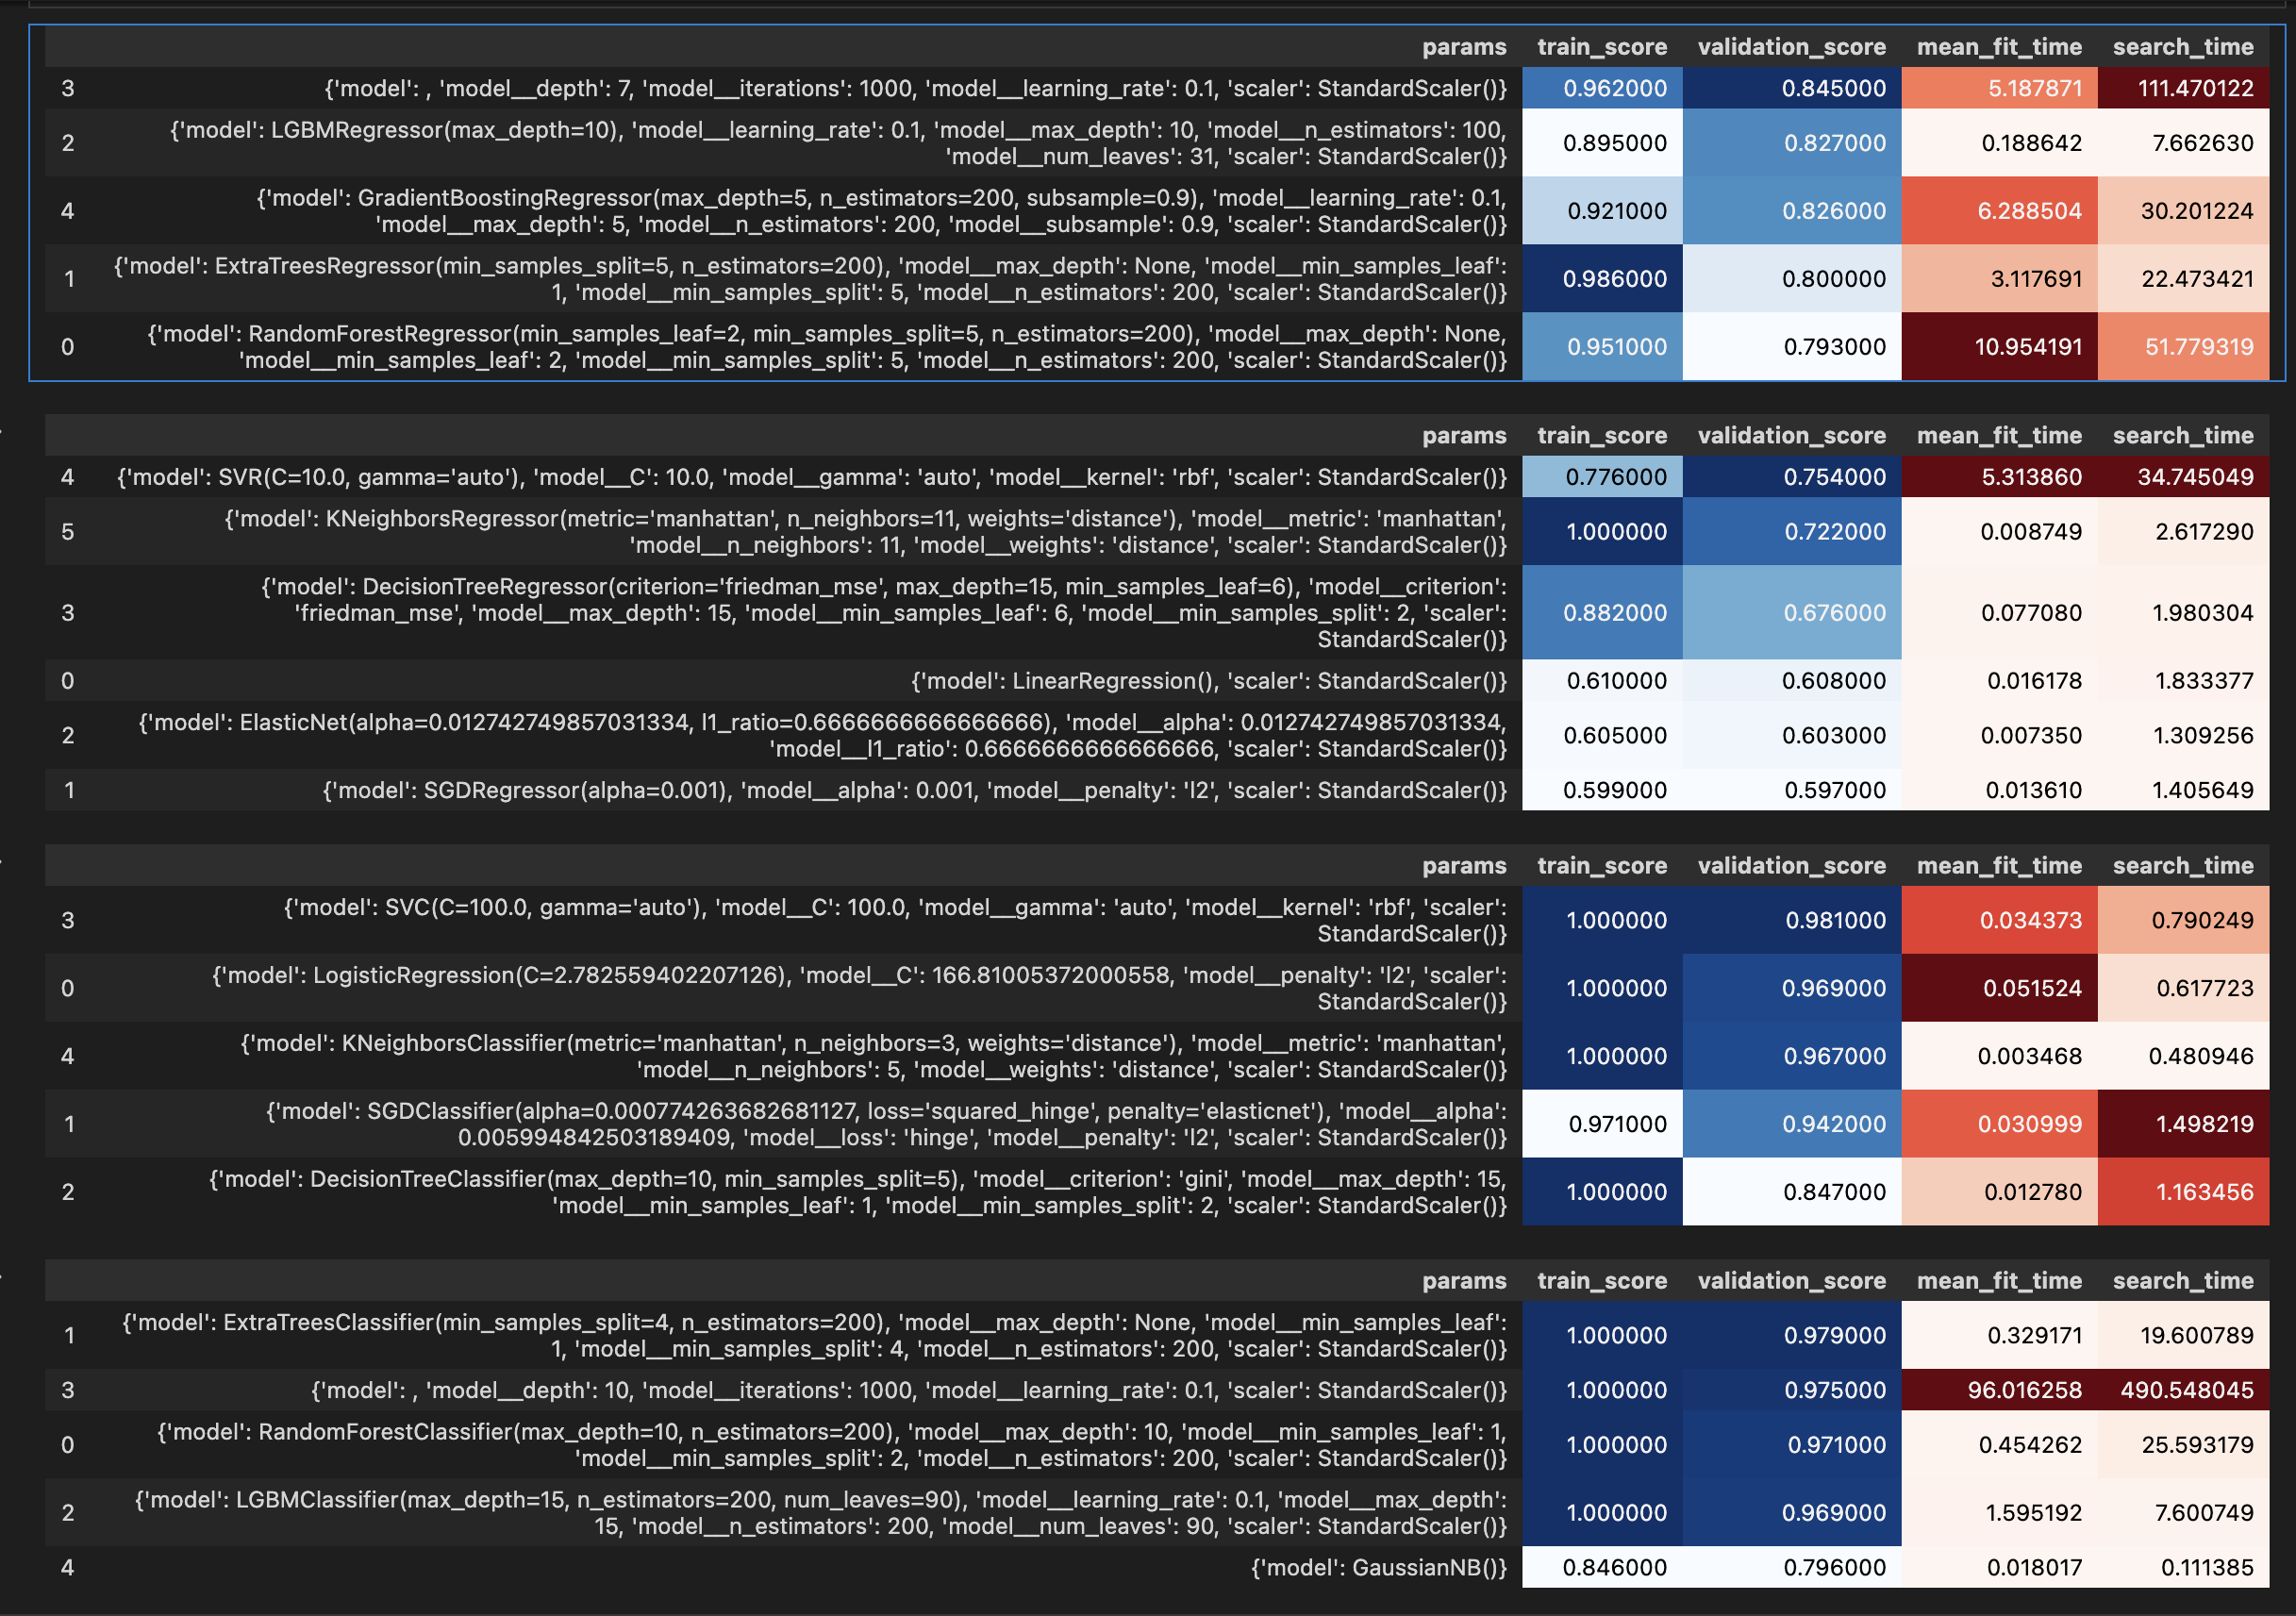